In [1]:
pip install scikit-learn


   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
Mean Absolute Error: 7.034373084024992e-14
Mean Squared Error: 9.784399579637254e-27
Root Mean Squared Error: 9.891612396185596e-14


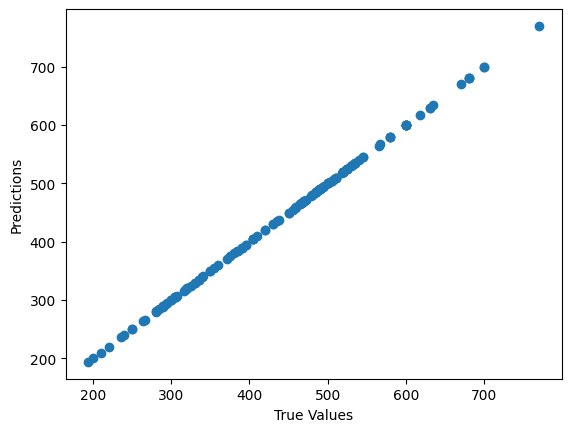

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the data from the CSV file
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Display the first few rows of the dataset
print(pokemon_data.head())

# Separate features (independent variables) and target (dependent variable)
X = pokemon_data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = pokemon_data['Total']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [26]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))


Mean Absolute Error: 20.91153403752516
Mean Squared Error: 801.8045414845857
Root Mean Squared Error: 28.316153366666626


In [8]:
import pandas as pd

# Load the data from the CSV file
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Perform one-hot encoding on 'Type 1' and 'Type 2' columns
pokemon_data_encoded = pd.get_dummies(pokemon_data, columns=['Type 1', 'Type 2'], dummy_na=True)

# Print the updated DataFrame
print(pokemon_data_encoded)


       #                   Name  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0      1              Bulbasaur    318  45      49       49       65       65   
1      2                Ivysaur    405  60      62       63       80       80   
2      3               Venusaur    525  80      82       83      100      100   
3      3  VenusaurMega Venusaur    625  80     100      123      122      120   
4      4             Charmander    309  39      52       43       60       50   
..   ...                    ...    ...  ..     ...      ...      ...      ...   
795  719                Diancie    600  50     100      150      100      150   
796  719    DiancieMega Diancie    700  50     160      110      160      110   
797  720    HoopaHoopa Confined    600  80     110       60      150      130   
798  720     HoopaHoopa Unbound    680  80     160       60      170      130   
799  721              Volcanion    600  80     110      120      130       90   

     Speed  Generation  ...

In [ ]:
# smote

In [18]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data from the CSV file
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assume 'Legendary' is the target variable
# You can replace 'Legendary' with the actual target variable in your dataset
target_variable = 'Legendary'

# Separate features (independent variables) and target (dependent variable)
X = pokemon_data[[ 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = pokemon_data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a classification model (Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.97      0.98       150
        True       0.64      0.90      0.75        10

    accuracy                           0.96       160
   macro avg       0.82      0.93      0.86       160
weighted avg       0.97      0.96      0.97       160



Class Distribution Before SMOTE:
False    735
True      65
Name: Legendary, dtype: int64

Class Distribution After SMOTE:
True     585
False    585
Name: Legendary, dtype: int64


In [10]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.94375
Classification Report:
               precision    recall  f1-score   support

          No       0.98      0.96      0.97       150
         Yes       0.54      0.70      0.61        10

    accuracy                           0.94       160
   macro avg       0.76      0.83      0.79       160
weighted avg       0.95      0.94      0.95       160



In [ ]:
# Statistical difference

In [14]:
import pandas as pd

# Load the data from the CSV file
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Print the descriptive statistics
print("Descriptive Statistics:")
print(pokemon_data.describe())

# Print the mean, median, mode, range, variance, and standard deviation individually
print("\nIndividual Statistics:")
print("Mean:")
print(pokemon_data.Total.mean())

print("\nMedian:")
print(pokemon_data.Total.median())

print("\nMode:")
print(pokemon_data.Total.mode().iloc[0])  # Mode returns a Series, use iloc[0] to get the first mode

print("\nRange:")
print(pokemon_data.Total.max() - pokemon_data.Total.min())

print("\nVariance:")
print(pokemon_data.Total.var())

print("\nStandard Deviation:")
print(pokemon_data.Total.std())


Descriptive Statistics:
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2

Count:

There are 800 Pokémon entries in the dataset, indicating that it's a relatively comprehensive collection.
Mean:

The mean total base stat is approximately 435, suggesting that, on average, Pokémon have a balanced distribution of stats.
Standard Deviation:

The standard deviations for HP, Attack, Defense, Sp. Atk, Sp. Def, and Speed are moderate, indicating moderate variability in these stats across different Pokémon.
Min, Max, and Range:

The minimum and maximum values provide insights into the range of each stat. For example, the minimum HP is 1, and the maximum is 255, indicating a wide range of health points among Pokémon.
Quartiles (25%, 50%, 75%):

The quartiles help understand the distribution of values. For instance, the median (50%) value for the total base stat is 450, indicating that half of the Pokémon have a total stat below this value.
Variance:

The variance of approximately 14,391 suggests that there is considerable variability in the total base stat among Pokémon.
Inference:

The dataset contains a diverse set of Pokémon with varying base stats.
The mean values provide a sense of the central tendency of the stats.
The standard deviations and ranges indicate the spread or variability in each stat.
Quartiles help in understanding the distribution of stats within the dataset.

In [15]:
import pandas as pd
import numpy as np

# Load the data from the CSV file
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Introduce random noise to the 'Total' column
noise_factor = 0.1  # You can adjust this value based on the amount of noise you want
np.random.seed(42)  # Set a seed for reproducibility
pokemon_data['Total_noisy'] = pokemon_data['Total'] * (1 + noise_factor * np.random.randn(len(pokemon_data)))

# Print a sample to see the changes
print(pokemon_data[['Total', 'Total_noisy']].head(10))


   Total  Total_noisy
0    318   333.795510
1    405   399.400296
2    525   559.003648
3    625   720.189366
4    309   301.764661
5    405   395.517453
6    534   618.329964
7    634   682.655362
8    634   604.235324
9    314   331.036385


In [20]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load the data from the CSV file
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assume 'Legendary' is the target variable
# You can replace 'Legendary' with the actual target variable in your dataset
target_variable = 'Legendary'

# Separate features (independent variables) and target (dependent variable)
X = pokemon_data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = pokemon_data[target_variable]

# Print class distribution before SMOTE
print("Class Distribution Before SMOTE:")
print(y.value_counts())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class Distribution Before SMOTE:
False    735
True      65
Name: Legendary, dtype: int64

Class Distribution After SMOTE:
True     585
False    585
Name: Legendary, dtype: int64


Mean Squared Error: 801.8045414845857
R-squared: 0.0916414526337812


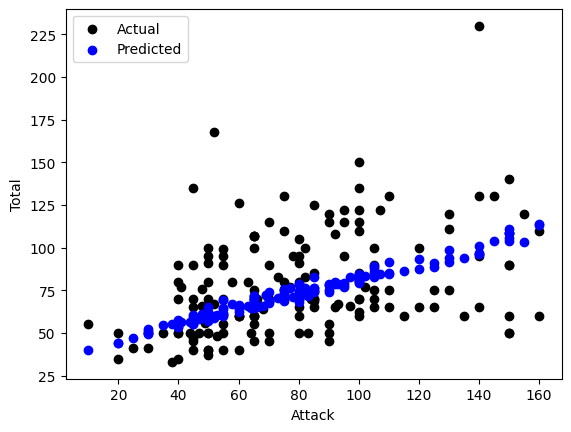

Accuracy: 0.94375
Confusion Matrix:
 [[145   5]
 [  4   6]]
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       150
        True       0.55      0.60      0.57        10

    accuracy                           0.94       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.95      0.94      0.94       160

